# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#Sample Set
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
print(cities)

# Print the city count to confirm sufficient count
len(cities)

['butaritari', 'husavik', 'alta floresta', 'jamestown', 'grinnell', 'kapaa', 'aklavik', 'taltal', 'hermanus', 'lagoa', 'san carlos de bariloche', 'ponta do sol', 'koboko', 'vikhorevka', 'rikitea', 'dosso', 'samalaeulu', 'grindavik', 'marsh harbour', 'yellowknife', 'narsaq', 'puerto ayora', 'nanortalik', 'tsihombe', 'ushuaia', 'mataura', 'ikongo', 'talcahuano', 'dalvik', 'vaini', 'pringsewu', 'azimur', 'svetlyy', 'ullapool', 'bluff', 'palu', 'punta arenas', 'ishurdi', 'vila velha', 'mwinilunga', 'tuktoyaktuk', 'naze', 'hobart', 'japura', 'klyuchi', 'barrow', 'thompson', 'miri', 'avarua', 'bredasdorp', 'obuasi', 'kavieng', 'magdagachi', 'port alfred', 'hithadhoo', 'port lincoln', 'campbell river', 'east millcreek', 'bilibino', 'busselton', 'asau', 'anadyr', 'dubbo', 'srednekolymsk', 'tuatapere', 'eydhafushi', 'thinadhoo', 'khatanga', 'hay river', 'vardo', 'vestmannaeyjar', 'namanga', 'jiddah', 'albany', 'diapaga', 'arinos', 'safwah', 'east london', 'baturaja', 'fortuna', 'yakeshi']


81

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key
#print(base_url)

# Create the lists to hold relative data
found_cities =[]
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Create a query url for each city in the cities list to get json response

print("Processing API calls from Open Weather")
for city in cities:
    
    time.sleep(1)
         
    # Create API url for each city
    query_url = base_url +"&q=" + city

    
    # Get json respose for each city
    response = requests.get(query_url).json()

   # Add the values to the lists
    try:       
        found_cities.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])

        print(f"{city} was found in weather data") 
        
    except KeyError:
        print(f"{city} not found. Skipped")
        pass
        
print("End of City list")



Processing API calls from Open Weather
butaritari was found in weather data
husavik was found in weather data
alta floresta was found in weather data
jamestown was found in weather data
grinnell was found in weather data
kapaa was found in weather data
aklavik was found in weather data
taltal was found in weather data
hermanus was found in weather data
lagoa was found in weather data
san carlos de bariloche was found in weather data
ponta do sol was found in weather data
koboko was found in weather data
vikhorevka was found in weather data
rikitea was found in weather data
dosso was found in weather data
samalaeulu not found. Skipped
grindavik was found in weather data
marsh harbour was found in weather data
yellowknife was found in weather data
narsaq was found in weather data
puerto ayora was found in weather data
nanortalik was found in weather data
tsihombe not found. Skipped
ushuaia was found in weather data
mataura was found in weather data
ikongo was found in weather data
talcah

In [4]:
#Create Dictionary

weather_raw_data = {
    "City": found_cities,
    "Latitude": lat,
    "Lng": lng,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
    "Date":date
    }

#Create Data Frame
weather_df = pd.DataFrame.from_dict(weather_raw_data, orient= 'columns')

#export to cs
weather_df.to_csv("output_data/cities.csv", index = False)
weather_df

,City,Latitude,Lng,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed
0,Butaritari,3.07,172.79,99,KI,1603132030,74,81.90,11.81
1,Husavik,66.04,-17.34,75,IS,1603132031,74,37.40,3.36
2,Alta Floresta,-9.88,-56.09,98,BR,1603132032,43,91.15,6.73
3,Jamestown,42.10,-79.24,90,US,1603132033,100,51.01,5.82
4,Grinnell,41.74,-92.72,90,US,1603131995,98,35.60,8.05
...,...,...,...,...,...,...,...,...,...
71,Arinos,-15.92,-46.11,100,BR,1603132110,58,79.59,4.90
72,East London,-33.02,27.91,50,ZA,1603132112,82,66.20,9.17
73,Baturaja,-4.13,104.17,64,ID,1603132113,94,74.88,2.19
74,Fortuna,40.60,-124.16,90,US,1603132086,100,55.00,4.70


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

In [5]:
#Create Plot Dates
#plot_date =({datetime.datetime.now().strftime("%D")})

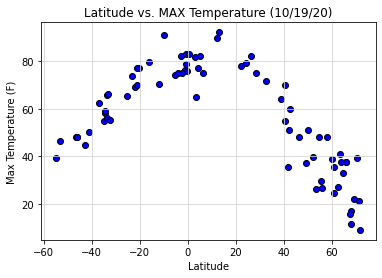

In [6]:
#create plot
plt.scatter(weather_df['Latitude'],weather_df['Max Temp'],edgecolors='black',facecolors='b')

#title and labels
plt.title(f'Latitude vs. MAX Temperature ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

#Save Plot
plt.savefig(f'images/Latitude vs. MAX Temperature.png')

### Latitude vs. Humidity Plot

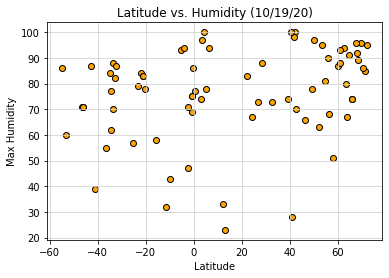

In [7]:
#create plot
plt.scatter(weather_df['Latitude'],weather_df['Humidity'],edgecolors='black',facecolors='orange')

#title and labels
plt.title(f'Latitude vs. Humidity ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Max Humidity')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

#Save Plot
plt.savefig(f"Images/Latitude vs. Humidity.png")

### Latitude vs. Cloudiness Plot

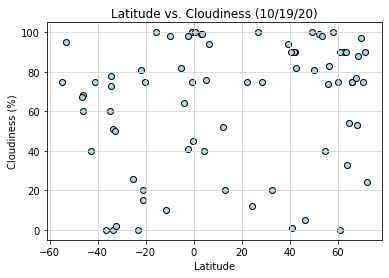

In [8]:
#Create Plot
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'],edgecolors='black',facecolors='lightblue')

#titles and lables
plt.title(f'Latitude vs. Cloudiness ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

#Save Plot
plt.savefig(f"images/Latitude vs. Cloudiness.png")

### Latitude vs. Wind Speed Plot

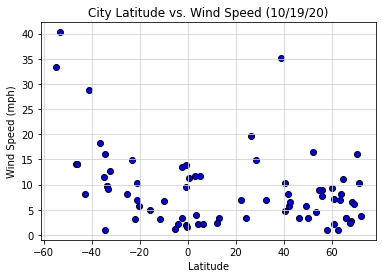

In [10]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],edgecolors="black",facecolors='b')
plt.title(f'City Latitude vs. Wind Speed ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.savefig(f'images/City Latitude vs. Wind Speed.png')

## Linear Regression

### Write linear regression plot function (optional)

In [11]:
#create hemispheres
north_hem = weather_df.loc[weather_df["Latitude"] >= 0]
south_hem = weather_df.loc[weather_df["Latitude"] < 0]


In [51]:
# Define function
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define annotation
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="orange")

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.9


TypeError: 'str' object is not callable

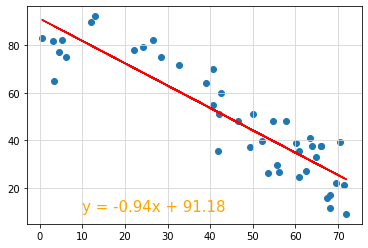

In [58]:
#use functions
equation = linear_regression(north_hem["Latitude"],north_hem["Max Temp"])
annotate(equation, 10, 10)

#title and labels
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Save the figure
plt.savefig(f"Images/Northern Hemisphere | Max Temp vs. Latitude Regression.png")

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.91


TypeError: 'str' object is not callable

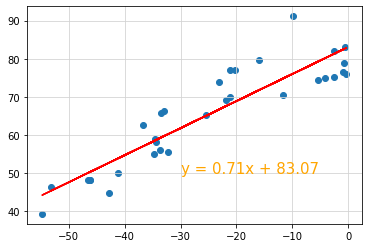

In [59]:
#use functions
equation = linear_regression(south_hem["Latitude"],south_hem["Max Temp"])
annotate(equation, -30, 50)

#title and labels
plt.title=(f"Southern Hemisphere | Max Temp vs. Latitude Regression ({datetime.datetime.now().strftime("%D")})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig(f"Images/Southern Hemisphere | Max Temp vs. Latitude Regression.png")

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.45


TypeError: 'Series' object is not callable

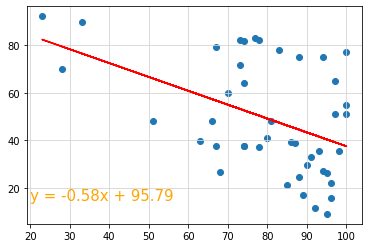

In [60]:
#use functions
equation = linear_regression(north_hem["Humidity"],north_hem["Max Temp"])
annotate(equation, 20, 15)

#title and labels
plt.title=(f"Northern Hemisphere | Humidity (%) vs. Latitude Regression ({datetime.datetime.now().strftime("%D")})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig(f"Images/Northern Hemisphere | Humidity (%) vs. Latitude Regression.png")

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.08


TypeError: 'Series' object is not callable

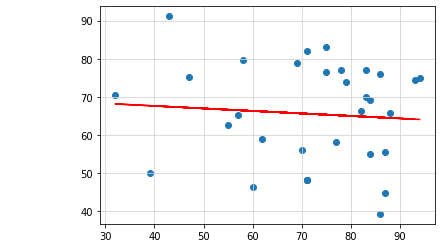

In [61]:
#use functions
equation = linear_regression(south_hem["Humidity"],south_hem["Max Temp"])
annotate(equation, 10, 50)

#title and labels
plt.title=(f"Southern Hemisphere | Humidity (%) vs. Latitude Regression ({datetime.datetime.now().strftime("%D")})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(f"Images/Southern Hemisphere | Humidity (%) vs. Latitude Regression.png")

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.1


TypeError: 'Series' object is not callable

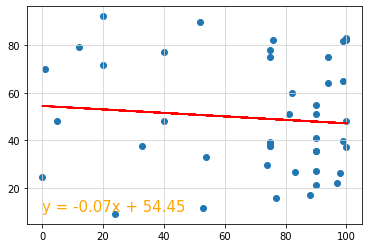

In [62]:
#plot variable
title_5 = "Northern Hemisphere - Cloudiness vs. Latitude Regression"

#use functions
equation = linear_regression(north_hem["Cloudiness"],north_hem["Max Temp"])
annotate(equation, 0, 10)

#title and labels
plt.title=(f"Northern Hemisphere | Coudiness (%) vs. Latitude Regression ({datetime.datetime.now().strftime("%D")})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(f"images/Northern Hemisphere | Cloudiness (%) vs. Latitude Regression.png")

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
#use functions
equation = linear_regression(south_hem["Cloudiness"],south_hem["Max Temp"])
annotate(equation, 30, 40)

#title and labels
plt.title=(f"Southern Hemisphere | Coudiness (%) vs. Latitude Regression ({datetime.datetime.now().strftime("%D")})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(f"images/Southern Hemisphere | Cloudiness (%) vs. Latitude Regression.png")

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.19


TypeError: 'Series' object is not callable

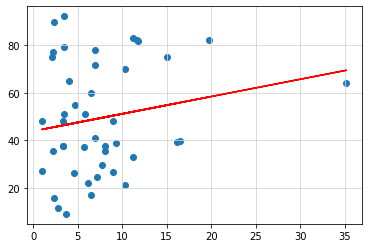

In [53]:
#plot variable
title_7 = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Regression"

#use functions
equation = linear_regression(north_hem["Wind Speed"],north_hem["Max Temp"])
annotate(equation, 0, 0)

#title and labels
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude Regression ({datetime.datetime.now().strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig(f"images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Regression.png")

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.08


TypeError: 'str' object is not callable

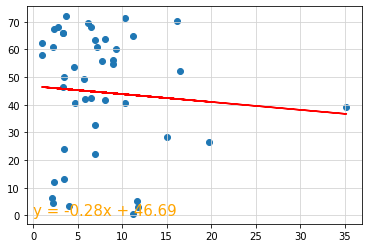

In [64]:
#use functions
equation = linear_regression(north_hem['Wind Speed'],north_hem['Latitude'])
annotate(equation, 0, 0)

#title and labels
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude Regression ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')

# Save the figure
plt.savefig(f'images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Regression.png')